In [2]:
import numpy as np
import matplotlib.pyplot as plt
import folium
import pandas as pd
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start=12)

In [4]:
df = pd.read_csv('camping_loc.csv', encoding='cp949' )
df1= df.filter(['캠핑(야영)장명','캠핑(야영)장구분','위도','경도','주소'])
df1

,캠핑(야영)장명,캠핑(야영)장구분,위도,경도,주소
0,최남단글램핑,자동차야영장,33.211782,126.255925,제주특별자치도 서귀포시 최남단해안로 113-0
1,서건도카라반,카라반,33.232536,126.500192,제주특별자치도 서귀포시 이어도로 826-51
2,돌고래 하우스 카라반,일반야영장,33.232731,126.499400,제주특별자치도 서귀포시 강정동 이어도로 826-58
3,햇살정원 제주캠핑&민박,일반야영장,33.240415,126.608152,제주특별자치도 서귀포시 보목동 보목포로65번길 6
4,쇠소깍오토파크,일반야영장,33.249539,126.614506,제주특별자치도 서귀포시 하효동
...,...,...,...,...,...
2286,화진포 오토캠핑장,일반야영장,38.470144,128.420107,강원도 고성군 현내면 모정2길 2
2287,명파 해변 오토캠핑장,자동차야영장,38.543611,128.405619,강원 고성군 현내면 명파4길 47
2288,백운계곡캠핑장,"일반야영장,글램핑",38.766079,127.379209,경기도 포천시 이동면 도평리 272-3
2289,계룡산글램핑파크 오브드림,"일반야영장,글램핑",124.000000,3452.000000,충남 공주시 반포면 학봉리 335


In [5]:
for i in df1.index:
# 행 우선 접근 방식으로 값 추출하기
    name = df1.loc[i, '캠핑(야영)장명']
    lat = df1.loc[i, '위도']
    lng = df1.loc[i, '경도']

 # 추출한 정보를 지도에 표시
    marker = folium.Marker([lat,lng], tooltip=name)
    marker.add_to(map_osm)
map_osm.save('전국야영장.html')

In [8]:
전남 = df['주소'].str.contains("전라남도|전남").sum()
전북 = df['주소'].str.contains("전라북도|전북").sum()
경북 = df['주소'].str.contains("경상북도|경북").sum()
경남 = df['주소'].str.contains("경상남도|경남").sum()
충남 = df['주소'].str.contains("충청남도|충남").sum()
충북 = df['주소'].str.contains("충청북도|충북").sum()
강원 = df['주소'].str.contains("강원").sum()

대구 = df['주소'].str.contains("대구").sum()
울산 = df['주소'].str.contains("울산").sum()
인천 = df['주소'].str.contains("인천").sum()
경기 = df['주소'].str.contains("경기").sum()
서울 = df['주소'].str.contains("서울").sum()
제주 = df['주소'].str.contains("제주").sum()
광주 = df['주소'].str.contains("광주").sum()
#도만 표시하라고 하여, 광역시는 제외했습니다
label = [전남,전북,경북,경남,충남,충북,강원,경기,제주]
#광역시포함시->광역시는 시라고 생각하여 뺐습니다
#label = [전남,전북,경북,경남,충남,충북,강원,경기,대구,울산,인천서울,제주,광주] 

([<matplotlib.axis.XTick at 0x1a9f3c70910>,
 [Text(0, 0, '전남'),
  Text(0, 0, '전북'),
  Text(0, 0, '경북'),
  Text(0, 0, '경남'),
  Text(0, 0, '충남'),
  Text(0, 0, '충북'),
  Text(0, 0, '강원'),
  Text(0, 0, '경기'),
  Text(0, 0, '제주')])

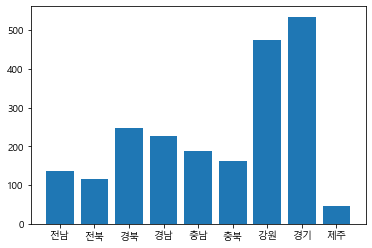

In [9]:
index = np.arange(len(label))
plt.bar(index,label)
plt.xticks(index,['전남','전북','경북','경남','충남','충북','강원','경기','제주'])